In [123]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import StandardScaler

#data frame formatting 

pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.max_columns',999)

PATH = 'C:/Users/rober/git/Robert-239/Python/Data_Sci_ProjC:/Users/rober/git/Robert-239/Python/Data_Sci_Proj'

In [169]:
df = pd.read_excel(".\\data\\online_retail_II.xlsx",sheet_name= 0)
print(df.head(10))

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate                Price          Customer ID  \
0 2009-12-01 07:45:00                 6.95             13085.00   
1 2009-12-01 07:45:00                 6.75             13085.00   
2 2009-12-01 07:45:00       

In [170]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [171]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [172]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [173]:
df[df["Customer ID"].isna()].head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [174]:
df[df["Quantity"] < 0].head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [175]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [176]:
df["Invoice"].str.replace("[0-9]","",regex = True).unique()

array(['', 'C', 'A'], dtype=object)

In [177]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [178]:
df["StockCode"] = df["StockCode"].astype("str") 
df[df["StockCode"].str.match("^\\d{5}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


In [179]:
df[(df["StockCode"].str.match("^\\d{5}$") == False ) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique() 

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [180]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


# DATA CLEANING

In [181]:
cleaned_df = df.copy()
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [182]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    cleaned_df["StockCode"].str.match("^\\d{5}$") |
    cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]$") |
    cleaned_df["StockCode"].str.match("^PADS$")
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [183]:
cleaned_df.dropna(subset=["Customer ID"], inplace= True)

C:\Users\rober\AppData\Local\Temp\ipykernel_6836\2224309254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace= True)


In [184]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,405555.00,405555,405555.00,405555.00
mean,13.62,2010-07-01 12:37:55.533823744,2.99,15373.28
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:16:00,1.25,14004.00
50%,5.00,2010-07-11 10:28:00,1.95,15326.00
75%,12.00,2010-10-14 17:23:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.08,NaN,4.29,1677.25


In [185]:
cleaned_df[cleaned_df["Price"] == 0]
len(cleaned_df[cleaned_df["Price"] == 0])

28

In [186]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]

In [187]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,405527.00,405527,405527.00,405527.00
mean,13.62,2010-07-01 12:41:15.852705280,2.99,15373.37
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:16:00,1.25,14004.00
50%,5.00,2010-07-11 10:28:00,1.95,15326.00
75%,12.00,2010-10-14 17:23:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.07,NaN,4.29,1677.21


In [143]:
len(cleaned_df)/len(df) * 100

77.17547068193453

Dropped 22.82 % of data

# FEATURE ENGINEERING

In [188]:
cleaned_df["SalesTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

C:\Users\rober\AppData\Local\Temp\ipykernel_6836\603871904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [189]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index= False).agg(
    MonetaryValue = ("SalesTotal", "sum"),
    Frequency = ("Invoice","nunique"),
    LastInvoiceDate = ("InvoiceDate", "max")
)

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,163.41,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [190]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [192]:
aggregated_df["Recency"] =(max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,163.41,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


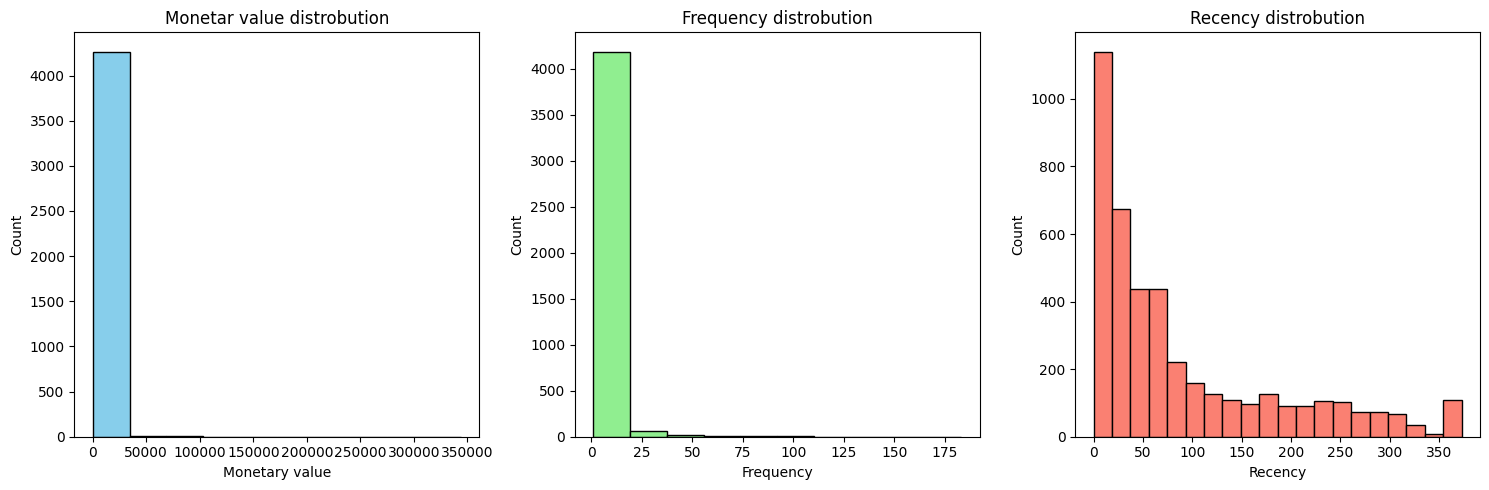

In [193]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df["MonetaryValue"], bins= 10 , color='skyblue',edgecolor= 'black')
plt.title("Monetar value distrobution")
plt.xlabel("Monetary value")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(aggregated_df["Frequency"], bins= 10 , color='lightgreen',edgecolor= 'black')
plt.title("Frequency distrobution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(aggregated_df["Recency"], bins= 20 , color='salmon',edgecolor= 'black')
plt.title("Recency distrobution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


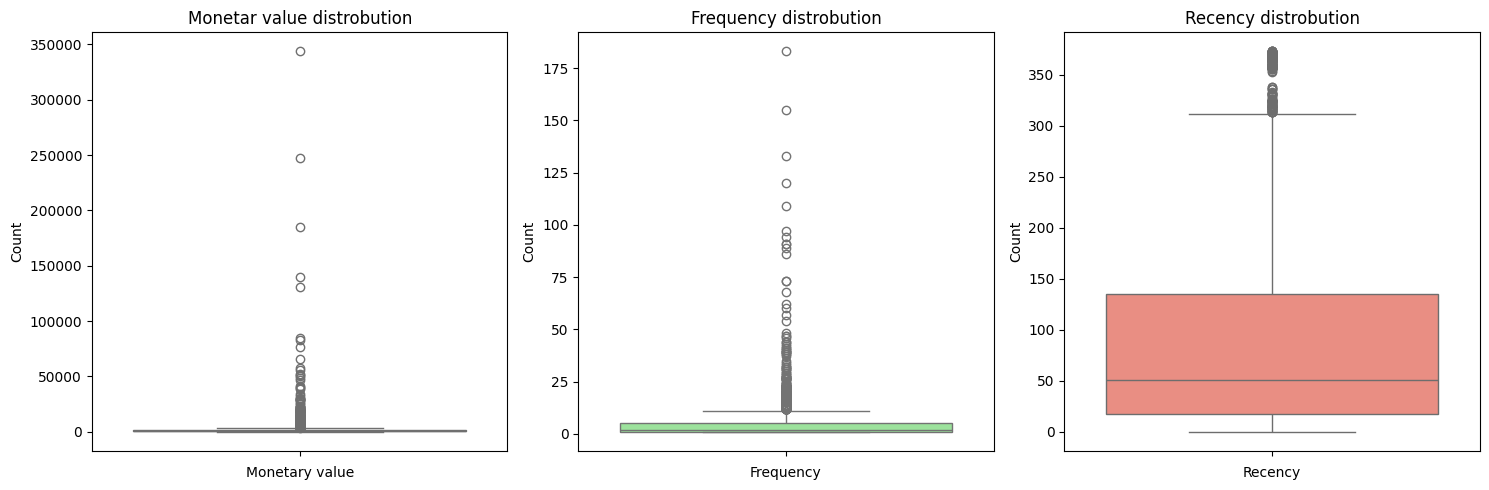

In [194]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(aggregated_df["MonetaryValue"], color='skyblue')
plt.title("Monetar value distrobution")
plt.xlabel("Monetary value")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.boxplot(aggregated_df["Frequency"], color='lightgreen')
plt.title("Frequency distrobution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.boxplot(aggregated_df["Recency"], color='salmon')
plt.title("Recency distrobution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [196]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)

M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)

M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,421.00,421.00,421.00,421,421.00
mean,15107.24,12150.49,17.23,2010-11-09 16:56:38.764845568,29.85
min,12357.00,3796.93,1.00,2009-12-10 18:03:00,0.00
25%,13615.00,4590.53,8.00,2010-11-08 15:42:00,3.00
50%,15005.00,6191.32,12.00,2010-11-26 12:44:00,13.00
75%,16700.00,10164.49,18.00,2010-12-06 11:06:00,31.00
max,18260.00,343764.35,183.00,2010-12-09 19:32:00,364.00
std,1731.68,25632.41,19.76,NaN,51.56


In [215]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)

F_Q3 = aggregated_df["Frequency"].quantile(0.75)

F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df["Frequency"] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14309.82,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1088.44,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4321.67,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6590.06,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,343764.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31069.99,21.93,NaN,26.59


In [216]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))].copy()

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3811.00,3811.00,3811.00,3811,3811.00
mean,15375.88,884.44,2.86,2010-09-03 11:37:33.077932288,97.07
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.50,277.93,1.00,2010-07-08 16:27:00,22.00
50%,15387.00,587.69,2.00,2010-10-12 16:25:00,58.00
75%,16851.00,1269.07,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1692.96,816.81,2.24,NaN,98.09


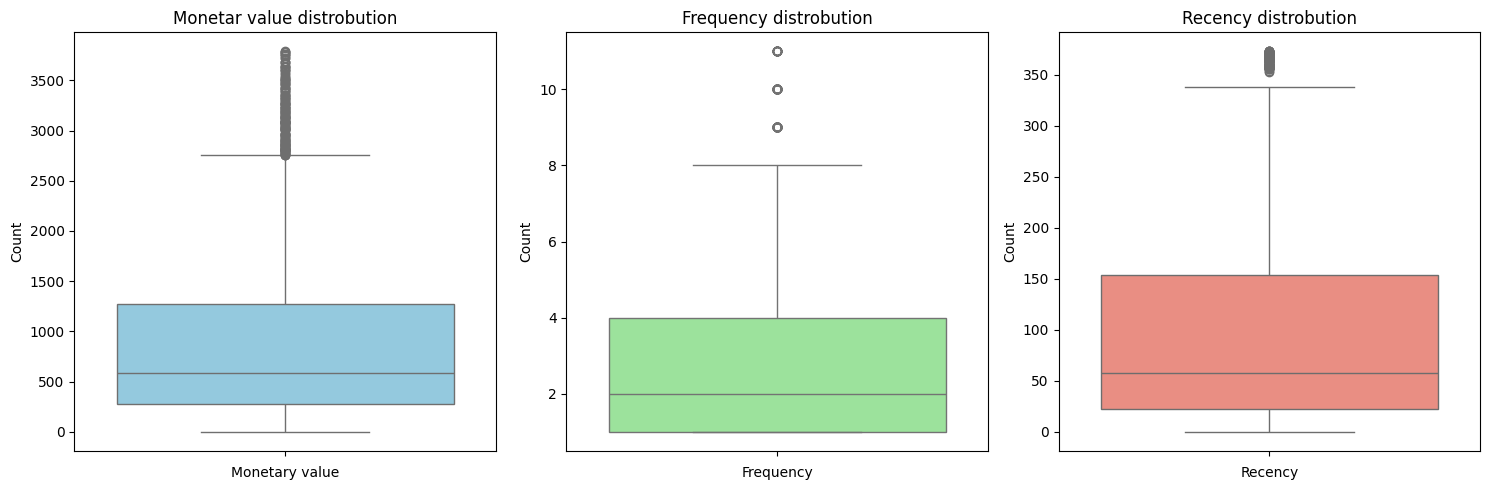

In [217]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(non_outliers_df["MonetaryValue"], color='skyblue')
plt.title("Monetar value distrobution")
plt.xlabel("Monetary value")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.boxplot(non_outliers_df["Frequency"], color='lightgreen')
plt.title("Frequency distrobution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.boxplot(non_outliers_df["Recency"], color='salmon')
plt.title("Recency distrobution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

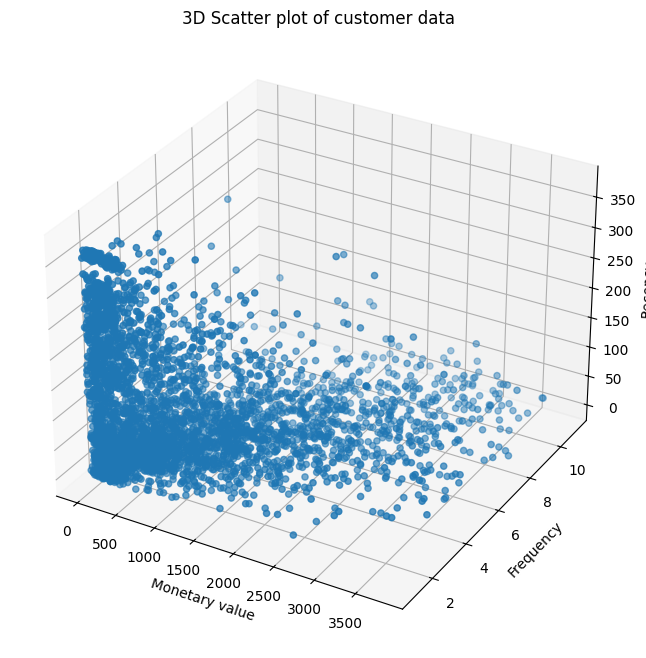

In [218]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'],non_outliers_df['Recency'])
ax.set_xlabel("Monetary value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter plot of customer data")

plt.show()

### SCALING

Use standerd scaling to ensure features of the dataset has a mean of 0 and standerd deviation of 1

z = (x - u)/sigma

- z is the standerdized value
- x the original value
- u is the mean
- sigma is the standerd deviation

In [219]:
scaler  = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[-0.88284831, -0.38531824,  0.68244986],
       [ 0.53737852, -0.38531824, -0.96932179],
       [-0.81213757, -0.83097766, -0.24539718],
       ...,
       [-0.62132263, -0.83097766,  2.01814175],
       [ 0.44323221, -0.38531824,  0.14205543],
       [ 1.72800052,  0.50600061, -0.81637997]])

In [220]:
scaled_data_df = pd.DataFrame(scaled_data,index=non_outliers_df.index,columns=("MonetaryValue","Frequency","Recency"))

scaled_data_df.describe()

,MonetaryValue,Frequency,Recency
count,3811.00,3811.00,3811.00
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.08,-0.83,-0.99
25%,-0.74,-0.83,-0.77
50%,-0.36,-0.39,-0.40
75%,0.47,0.51,0.58
max,3.56,3.63,2.81


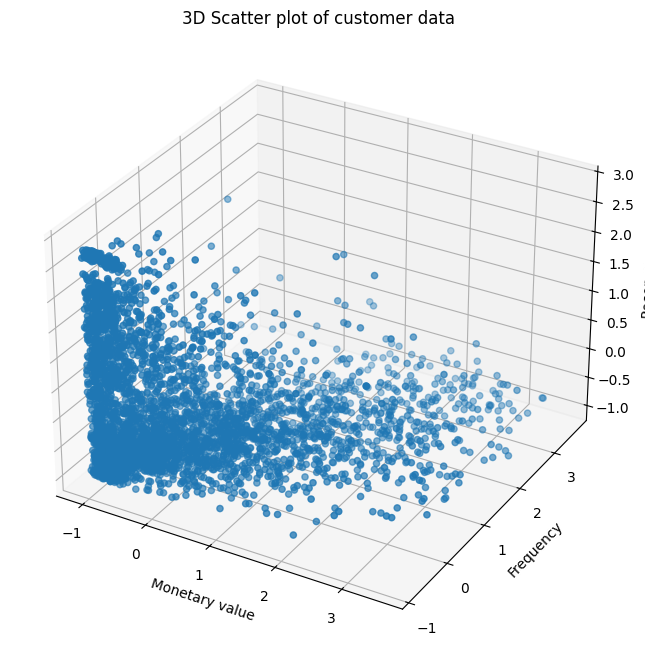

In [221]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'],scaled_data_df['Recency'])
ax.set_xlabel("Monetary value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter plot of customer data")

plt.show()

# KMeans CLUSTERING

c:\Users\rober\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rober\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rober\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rober\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

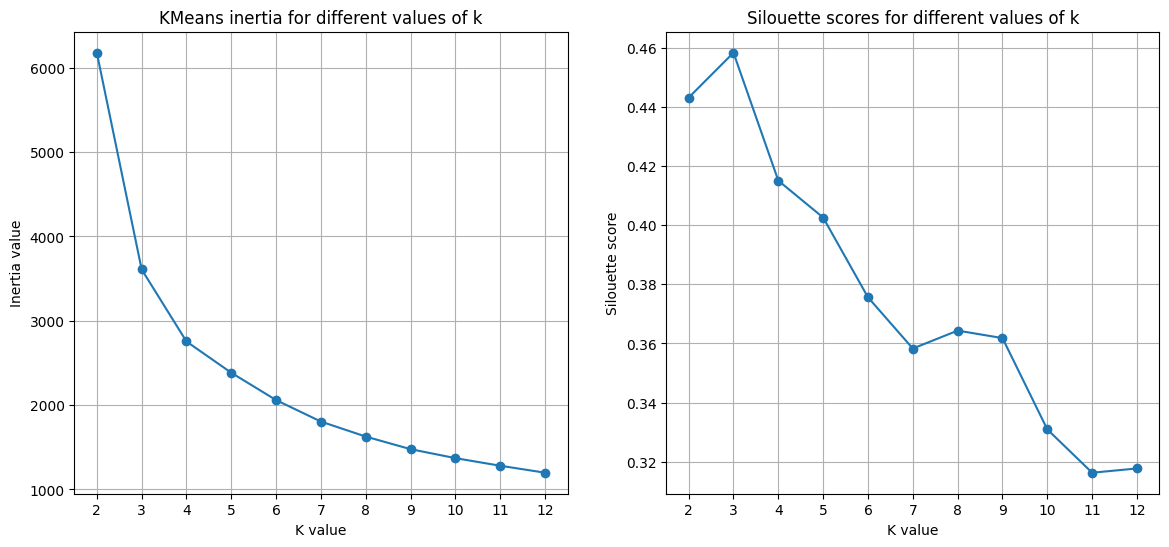

In [222]:
max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2,max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k , random_state=42 , max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df,cluster_labels)

    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values,inertia,marker='o')
plt.title("KMeans inertia for different values of k")
plt.xlabel("K value")
plt.ylabel("Inertia value")
plt.xticks(k_values)
plt.grid()

plt.subplot(1,2,2)
plt.plot(k_values,silhouette_scores,marker='o')
plt.title("Silouette scores for different values of k")
plt.xlabel("K value")
plt.ylabel("Silouette score")
plt.xticks(k_values)
plt.grid()

plt.show()

# Silhouette Score

s(i) = (b_i - a_i)/max(a_i,b_i)

Where: 
- s(i) is the silhouette score for sample i
- a_i is the average distance between i and all other points in the same cluster
- b_i is the minimum average distance between i and all points in the nearest cluster to which i does not belong

The silhouette score ranges between [-1,1], a higher value indicates more distinct clusters

In [223]:
kmeans = KMeans(n_clusters= 4, random_state= 42 , max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

c:\Users\rober\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 1, 0, ..., 2, 1, 1])

In [224]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,163.41,2,2010-06-28 13:53:00,164,2
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,1
2,12348.00,221.16,1,2010-09-27 14:59:00,73,0
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,1
4,12351.00,300.93,1,2010-11-29 15:23:00,10,0
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,1
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,0
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,2
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,1


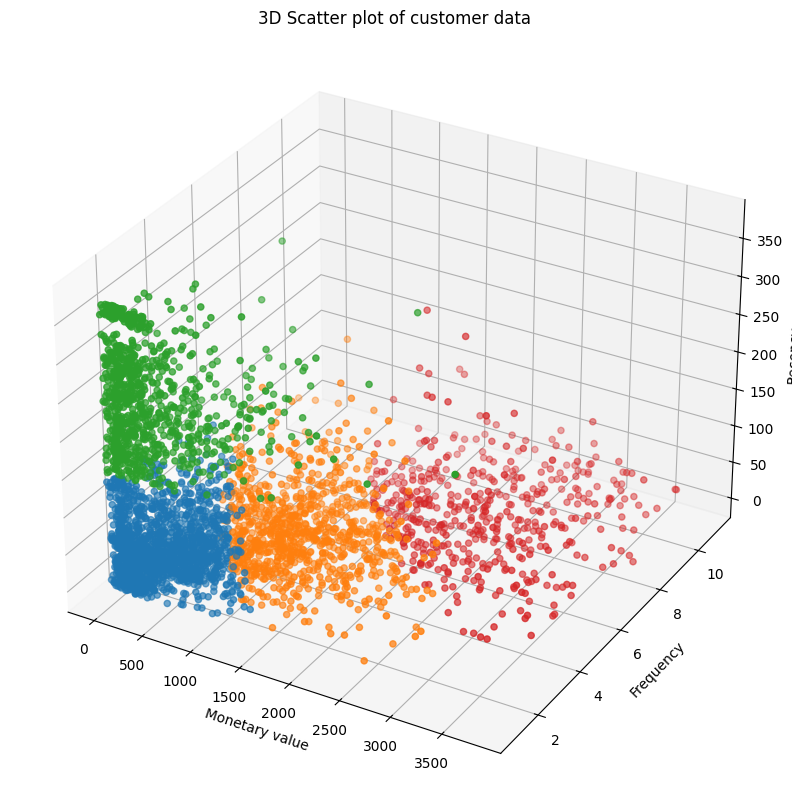

In [225]:
cluster_colors = {  0: "#1f77b4",
                    1: "#ff7f0e",
                    2: "#2ca02c",
                    3: "#d62728"}

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c= colors,
                     marker='o')
ax.set_xlabel("Monetary value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter plot of customer data")

plt.show()

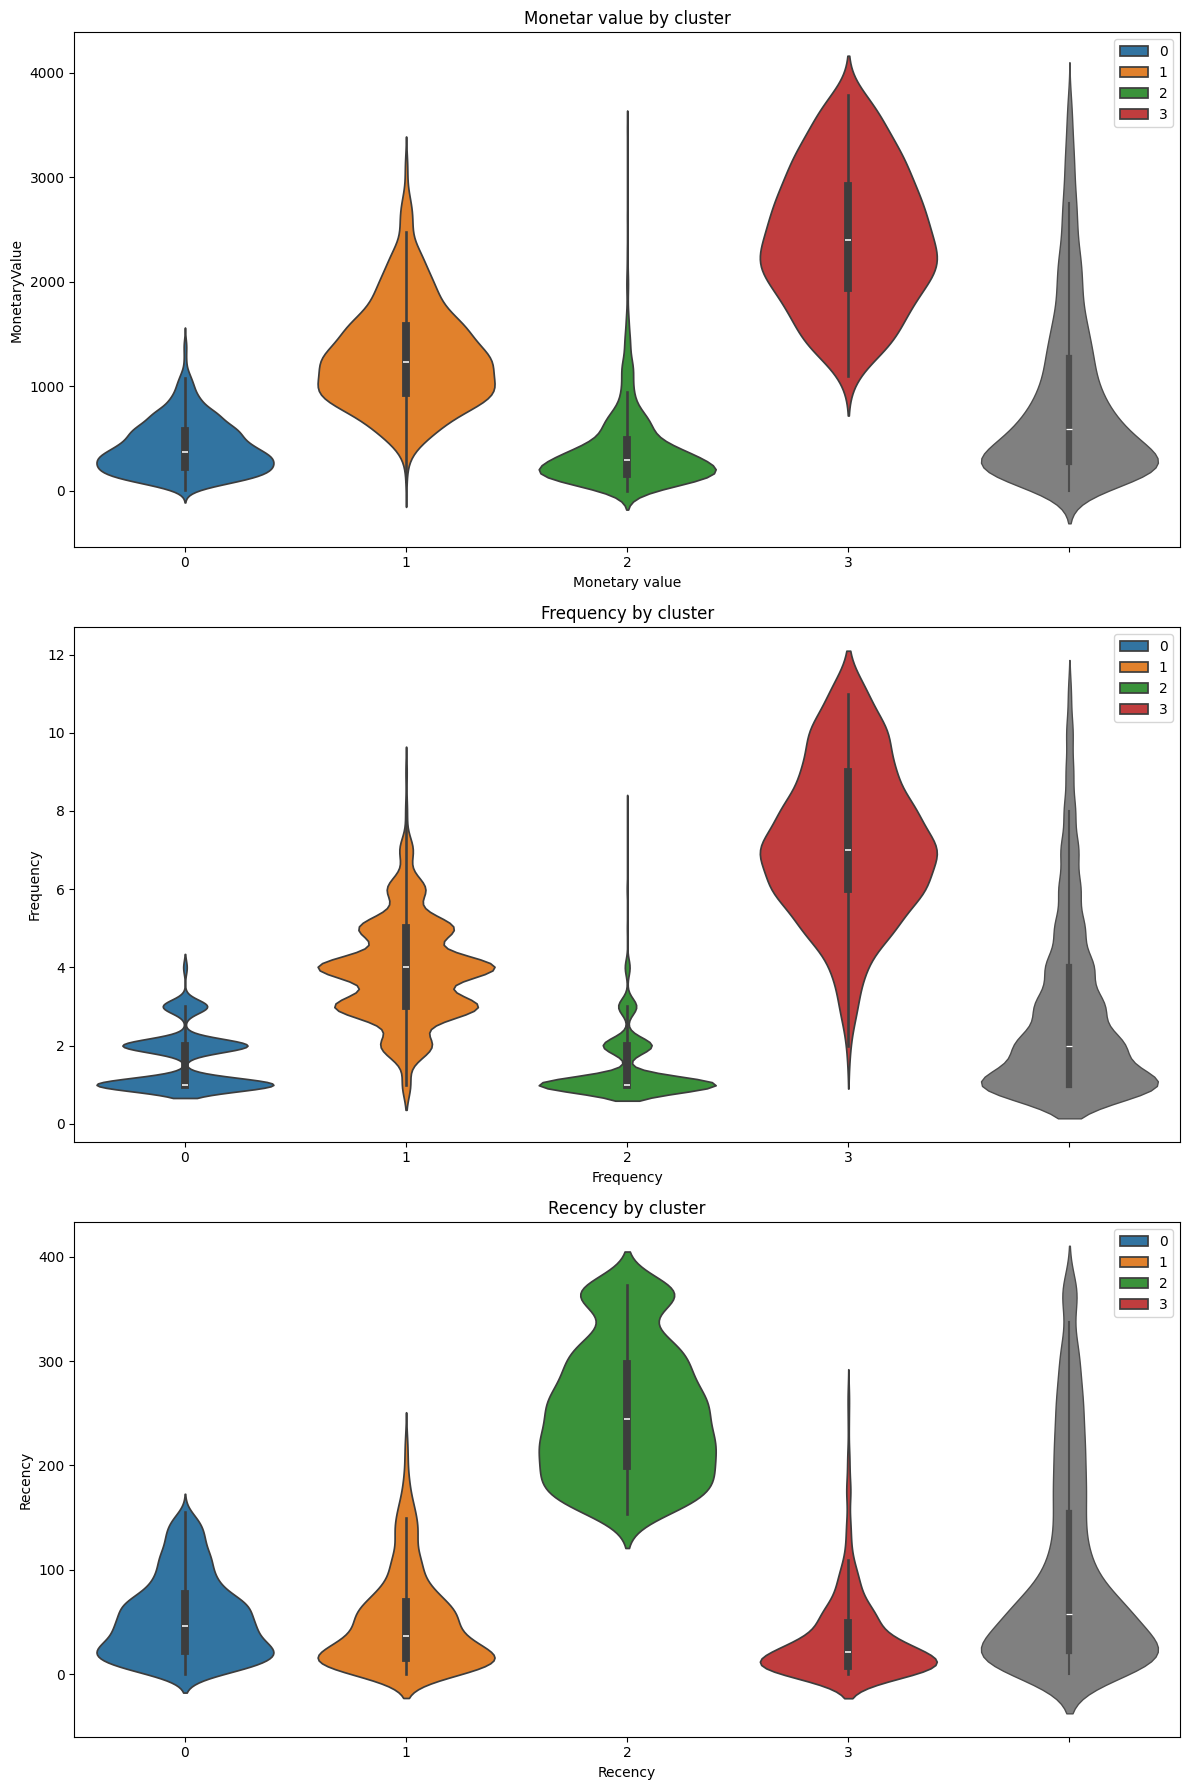

In [226]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x = non_outliers_df["Cluster"],y = non_outliers_df["MonetaryValue"], palette= cluster_colors, hue= non_outliers_df["Cluster"])
sns.violinplot(y = non_outliers_df["MonetaryValue"], color= 'grey', linewidth= 1.0)
plt.title("Monetar value by cluster")
plt.xlabel("Monetary value")


plt.subplot(3,1,2)
sns.violinplot(x = non_outliers_df["Cluster"],y = non_outliers_df["Frequency"], palette= cluster_colors, hue= non_outliers_df["Cluster"])
sns.violinplot(y = non_outliers_df["Frequency"], color= 'grey', linewidth= 1.0)
plt.title("Frequency by cluster")
plt.xlabel("Frequency")


plt.subplot(3,1,3)
sns.violinplot(x = non_outliers_df["Cluster"],y = non_outliers_df["Recency"], palette= cluster_colors, hue= non_outliers_df["Cluster"])
sns.violinplot(y = non_outliers_df["Recency"], color= 'grey', linewidth= 1.0)
plt.title("Recency by cluster")
plt.xlabel("Recency")


plt.tight_layout()
plt.show()

## Cluster 0 (Blue)

RE-ENGAGE

- Don't spend alot
- Don't spend very frequently
- Didn't spend very recently

Focus on building customers, Provide excellent service and provide incentives to encourage more purchases.

## Cluster 1 (Orange)

Retain customers

- Spend alot
- Buy at a high frequency

They didn't purchase very recently 
Focus should be to retain loyalty and retention levels

- Implement loyalty pragrams, personalized offers and regular engagement to ensure they remain active

## Cluster 2 (Green)

Focus on growing cutomer spending habits
Nurture
- Not very recent purchuses 
- Not very frequent purchases 
- Doesn't spend alot

Focus should be to Increase the amount of money spent by these customers and/or the frequency at which they purchase items
Offer special promotions on limited higher value items

## Cluster 3 (Red)


- Spends a lot on purchuses
- Buy at a high frequency
- Very recent purchuses 

Reward



In [227]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers,frequency_only_outliers,monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7409.21,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


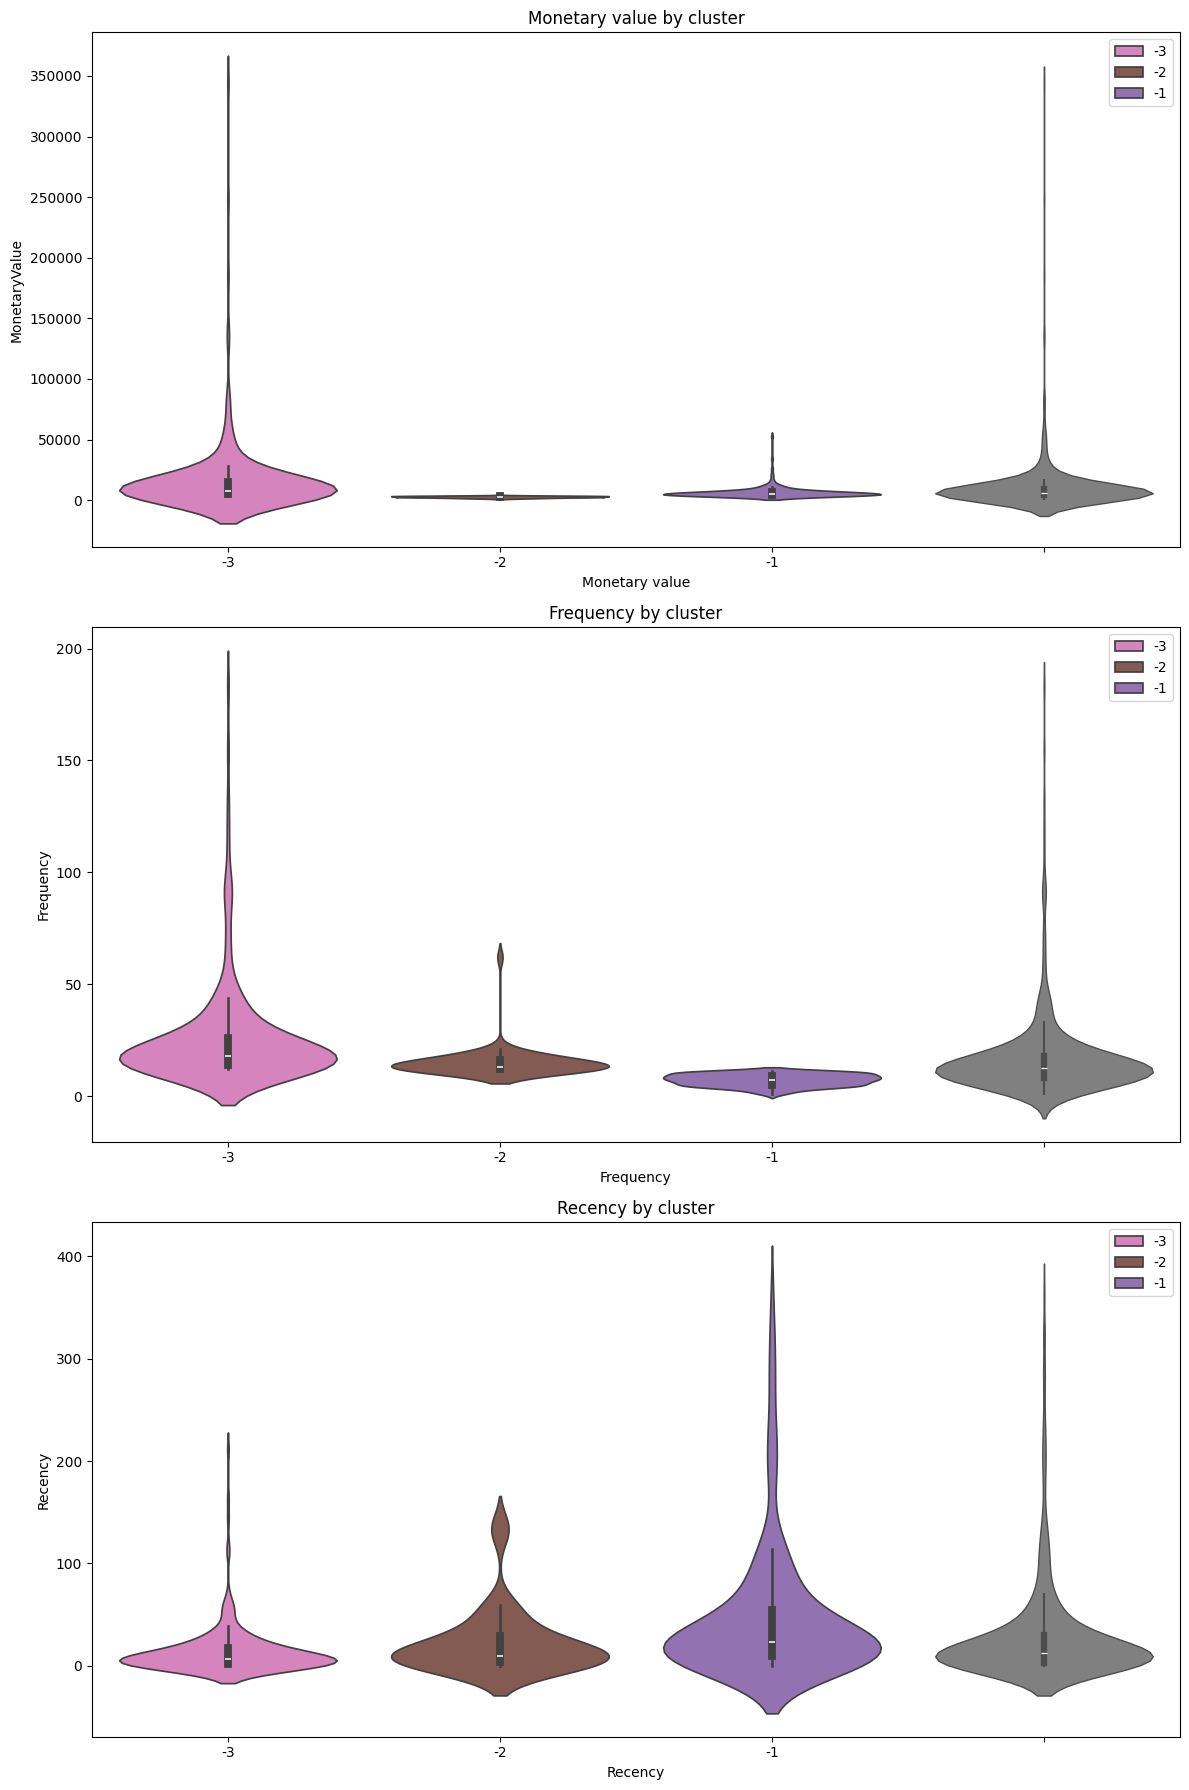

In [228]:
cluster_colors = {  -1: '#9467bd',
                    -2: '#8c564b',
                    -3: '#e377c2'}

plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x = outlier_clusters_df["Cluster"],y = outlier_clusters_df["MonetaryValue"], palette= cluster_colors, hue= outlier_clusters_df["Cluster"])
sns.violinplot(y = outlier_clusters_df["MonetaryValue"], color= 'grey', linewidth= 1.0)
plt.title("Monetary value by cluster")
plt.xlabel("Monetary value")


plt.subplot(3,1,2)
sns.violinplot(x = outlier_clusters_df["Cluster"],y = outlier_clusters_df["Frequency"], palette= cluster_colors, hue= outlier_clusters_df["Cluster"])
sns.violinplot(y = outlier_clusters_df["Frequency"], color= 'grey', linewidth= 1.0)
plt.title("Frequency by cluster")
plt.xlabel("Frequency")


plt.subplot(3,1,3)
sns.violinplot(x = outlier_clusters_df["Cluster"],y = outlier_clusters_df["Recency"], palette= cluster_colors, hue= outlier_clusters_df["Cluster"])
sns.violinplot(y = outlier_clusters_df["Recency"], color= 'grey', linewidth= 1.0)
plt.title("Recency by cluster")
plt.xlabel("Recency")


plt.tight_layout()
plt.show()

In [235]:
cluster_labels = {
    0: "GROW",
    1: "RETAIN",
    2: "RE-ENGAGE",
    3: "Reward",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [236]:
full_clustering_df= pd.concat([non_outliers_df,outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,163.41,2,2010-06-28 13:53:00,164,2
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,1
2,12348.00,221.16,1,2010-09-27 14:59:00,73,0
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,1
4,12351.00,300.93,1,2010-11-29 15:23:00,10,0
...,...,...,...,...,...,...
4235,18223.00,7409.21,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


In [237]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,163.41,2,2010-06-28 13:53:00,164,2,RE-ENGAGE
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,1,RETAIN
2,12348.00,221.16,1,2010-09-27 14:59:00,73,0,GROW
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,1,RETAIN
4,12351.00,300.93,1,2010-11-29 15:23:00,10,0,GROW
...,...,...,...,...,...,...,...
4235,18223.00,7409.21,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


Index(['GROW', 'RETAIN', 'RE-ENGAGE', 'Reward', 'DELIGHT', 'PAMPER', 'UPSELL'], dtype='object', name='ClusterLabel')


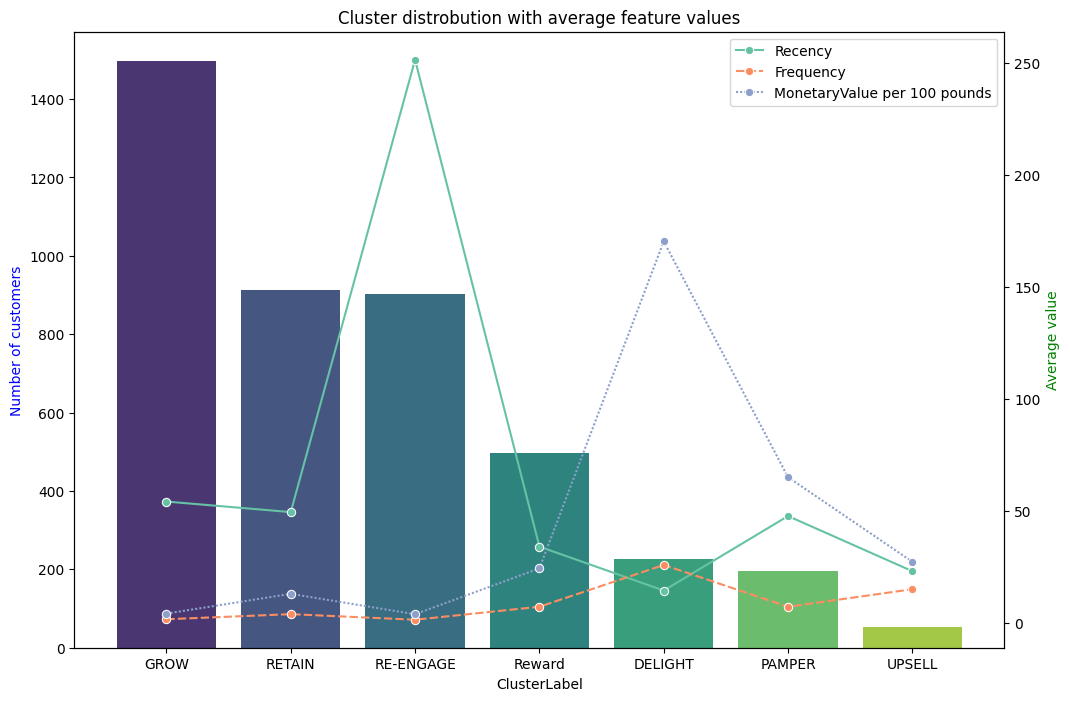

In [238]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df['MonetaryValue per 100 pounds'] = full_clustering_df['MonetaryValue']/100
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency','Frequency','MonetaryValue per 100 pounds']].mean()
print(cluster_counts.index)


fig ,ax1 = plt.subplots(figsize = (12,8))

sns.barplot(x= cluster_counts.index, y = cluster_counts.values, ax= ax1, palette='viridis', hue= cluster_counts.index)
ax1.set_ylabel('Number of customers', color = 'b')
ax1.set_title('Cluster distrobution with average feature values')


ax2 = ax1.twinx()

sns.lineplot(data= feature_means, ax= ax2 , palette='Set2', marker= 'o')
ax2.set_ylabel('Average value', color= 'g')

plt.show()